In [1]:
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline
# un bonita funcion para hacer los querys 
def query_BQ(query_string):
    client = bigquery.Client() # inicializamos el cliente, pero antes se debe de fijar la variable de entorno 
    query_job = client.query(query_string)
    results = query_job.result().to_dataframe()  # Waits for job to complete and cast to pandas dataframe
    return(results)

In [2]:
from sklearn.preprocessing import scale
from h2o.automl import H2OAutoML
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators import H2ONaiveBayesEstimator
from sklearn.metrics import confusion_matrix
from google.cloud import bigquery # modulo para interactuar con la API y el service account del DW
import pandas as pd
import numpy as np
import h2o
import datetime
inicio = datetime.datetime.now()

In [3]:
query = '''
SELECT distinct user_id,
max(baby_age) as baby_age,
max(days_to_convert) as days_to_convert, /*Use only for analysis*/
#max(days_to_take_FT) as days_to_take_FT,
max(days_in_app) as days_in_app,
max(device) as device,#
max(adjust_network) as adjust_network,
max(android_app_version) as android_app_version,
max(android_lib_version) as android_lib_version /*.002 null class*/,
max(screen_width) as screenwidth,
max(timezone) as timezone,
max(user_relationship) as user_relationship,
max(user_role) as user_role,
#max(initial_assessment_completed) as initial_assessment_completed,
#max(FT_start) as FT_start,
#max(FT_conversion) as FT_conversion,
#mp_country,
y,
sum(case when video = "Completed" then 1 else 0 end) as Video_Completed,
sum(case when name ="OpenApp" then 1 else 0 end) as OpenApp,
sum(case when name ="LogOut" then 1 else 0 end) as LogOut,
sum(case when name ="S_DAPNewSkills" then 1 else 0 end) as S_DAPNewSkills,
sum(case when name ="AB_TEST" then 1 else 0 end) as AB_TEST,
sum(case when name ="S_SPHome" then 1 else 0 end) as S_SPHome,
sum(case when name ="S_SPLogin" then 1 else 0 end) as S_SPLogin,
sum(case when name ="LogIn" then 1 else 0 end) as LogIn,
sum(case when name ="SPForgotPass" then 1 else 0 end) as SPForgotPass,
sum(case when name ="S_SPSignup" then 1 else 0 end) as S_SPSignup,
sum(case when name ="SignUp" then 1 else 0 end) as SignUp,
sum(case when name ="OBCreateUser" then 1 else 0 end) as OBCreateUser,
sum(case when name ="S_OBBabyName" then 1 else 0 end) as S_OBBabyName,
sum(case when name ="OBCreateTwins" then 1 else 0 end) as OBCreateTwins,
sum(case when name ="S_OBPremature" then 1 else 0 end) as S_OBPremature,
sum(case when name ="Paywall_Dismiss" then 1 else 0 end) as Paywall_Dismiss,
sum(case when name ="S_Paywall_Soft" then 1 else 0 end) as S_Paywall_Soft,
sum(case when name ="S_IAIntro" then 1 else 0 end) as S_IAIntro,
sum(case when name ="IAStraightToActivities" then 1 else 0 end) as IAStraightToActivities,
sum(case when name ="IAStartAssessment" then 1 else 0 end) as IAStartAssessment,
sum(case when name ="IASkipAssessment" then 1 else 0 end) as IASkipAssessment,
sum(case when name ="MasterSkill" then 1 else 0 end) as MasterSkill,
sum(case when name ="IAFinishSkill" then 1 else 0 end) as IAFinishSkill,
sum(case when name ="S_HealthInterest" then 1 else 0 end) as S_HealthInterest,
sum(case when name ="S_IASetReminder" then 1 else 0 end) as S_IASetReminder,
sum(case when name ="IAReminder" then 1 else 0 end) as IAReminder,
sum(case when name ="S_IA_Answer_Skill" then 1 else 0 end) as S_IA_Answer_Skill,
sum(case when name ="DAPChangeActivity" then 1 else 0 end) as DAPChangeActivity,
sum(case when name ="S_DAPPastPlansPremium" then 1 else 0 end) as S_DAPPastPlansPremium,
sum(case when name ="DAPActivityCompleted" then 1 else 0 end) as DAPActivityCompleted,
sum(case when name ="S_DAPMaterials" then 1 else 0 end) as S_DAPMaterials,
sum(case when name ="MilestonesUpdate" then 1 else 0 end) as MilestonesUpdate,
sum(case when name ="ArticleView" then 1 else 0 end) as ArticleView,
sum(case when name ="SlideshowView" then 1 else 0 end) as SlideshowView,
sum(case when name ="ActivityView" then 1 else 0 end) as ActivityView,
sum(case when name ="ClickInDAP" then 1 else 0 end) as ClickInDAP,
sum(case when name ="RateActivityDAP" then 1 else 0 end) as RateActivityDAP,
sum(case when name ="Feedback_RateActivity" then 1 else 0 end) as Feedback_RateActivity,
sum(case when name ="Dismiss_Feedback_RateActivity" then 1 else 0 end) as Dismiss_Feedback_RateActivity,
sum(case when name ="LifeSpent" then 1 else 0 end) as LifeSpent,
sum(case when name ="WhatchAd" then 1 else 0 end) as WhatchAd,
sum(case when name ="VideoPlayerActivity" then 1 else 0 end) as VideoPlayerActivity,
sum(case when name ="NPSSubmit" then 1 else 0 end) as NPSSubmit,
sum(case when name ="S_NPSScore" then 1 else 0 end) as S_NPSScore,
sum(case when name ="S_ProgressHome" then 1 else 0 end) as S_ProgressHome,
sum(case when name ="S_MenuFamilyHome" then 1 else 0 end) as S_MenuFamilyHome,
sum(case when name ="MenuHelp" then 1 else 0 end) as MenuHelp,
sum(case when name ="MenuMemberStats" then 1 else 0 end) as MenuMemberStats,
sum(case when name ="MenuFamilyInvite" then 1 else 0 end) as MenuFamilyInvite,
sum(case when name ="MenuChangeBirthday" then 1 else 0 end) as MenuChangeBirthday,
sum(case when name ="S_MenuEditBaby" then 1 else 0 end) as S_MenuEditBaby,
sum(case when name ="S_MenuUserProfile" then 1 else 0 end) as S_MenuUserProfile,
sum(case when name ="MenuFamilyDefault" then 1 else 0 end) as MenuFamilyDefault,
sum(case when name ="S_MenuFamilyProfile" then 1 else 0 end) as S_MenuFamilyProfile,
sum(case when name ="TAPCallToAction" then 1 else 0 end) as TAPCallToAction,
sum(case when name ="S_PremiumProcess" then 1 else 0 end) as S_PremiumProcess,
sum(case when name ="RestorePurchase" then 1 else 0 end) as RestorePurchase,
sum(case when name ="S_CATHome_P" then 1 else 0 end) as S_CATHome_P,
sum(case when name ="S_CATHome_F" then 1 else 0 end) as S_CATHome_F,
sum(case when name ="CATSearch" then 1 else 0 end) as CATSearch,
sum(case when name ="S_CATViewSkill" then 1 else 0 end) as S_CATViewSkill,
sum(case when name ="S_CollectionView" then 1 else 0 end) as S_CollectionView,
sum(case when name ="ViewAllCollections" then 1 else 0 end) as ViewAllCollections,
sum(case when name ="S_SearchEmptyState" then 1 else 0 end) as S_SearchEmptyState,
sum(case when name ="ResetSearch" then 1 else 0 end) as ResetSearch,
sum(case when name ="S_MilestonesHome" then 1 else 0 end) as S_MilestonesHome,
sum(case when name ="SkillsViewAllSkills" then 1 else 0 end) as SkillsViewAllSkills,
sum(case when name ="S_PromoCode" then 1 else 0 end) as S_PromoCode,
sum(case when name ="PromoCodeRedeem" then 1 else 0 end) as PromoCodeRedeem,
sum(case when name ="S_FeedHome" then 1 else 0 end) as S_FeedHome,
sum(case when name ="InviteClassrooms" then 1 else 0 end) as InviteClassrooms,
sum(case when name ="shown" then 1 else 0 end) as shown,
sum(case when name ="clicked" then 1 else 0 end) as clicked,
sum(case when name ="dismissed" then 1 else 0 end) as dismissed
from
(
SELECT u.id as user_id,
date_diff(current_date('UTC'),date(b.birthday), month) as baby_age,
#timestamp_diff(timestamp(current_date('UTC')),b.birthday, day) as baby_ageD,
timestamp_diff(ued.trial_start ,u.created_at, day) as days_to_take_FT,/*Use only for analysis*/
timestamp_diff(timestamp(current_date('UTC')) ,u.created_at, day) as days_in_app,/*Use only for analysis*/

timestamp_diff(ued.premium_conversion_date,u.created_at, day) as days_to_convert,/*Use only for analysis*/
ev.name, ev.screen_height,ev.screen_width,ev.properties,
u.mp_country,
u.adjust_network,
IF(ev.name= "VideoPlayerActivity" and JSON_EXTRACT(ev.properties, "$.video_completed")="true", "Completed", "Not Completed") as Video,
if (ev.device is null, 'NULL', ev.device) as device,
/*0.01915nulls */
if (p.android_app_version is null, 'NULL', android_app_version) as android_app_version, /*all related to android will be categoric 0.001 nulls*/
if( p.android_app_version_code is null, 'NULL', cast( android_app_version_code as string) ) as android_app_version_code,
if( android_brand is null, 'NULL', android_brand) as android_brand,
if(android_lib_version is null, 'NULL', android_lib_version)  as android_lib_version,
if(android_manufacturer is null, 'NULL', android_manufacturer) as android_manufacturer,
if(android_os_version is null, 'NULL', android_os_version) as android_os_version,
if(ued.premium_conversion_date is not null, 'Premium', 'Freemium') as y,
if(p.initial_assessment_completed is  null or initial_assessment_completed="NO", 0, 1) as initial_assessment_completed,
p.timezone,
if(p.user_relationship is null, 'NULL', user_relationship) as user_relationship,
if(p.user_role is null, 'NULL', user_role) as user_role,
if(ued.trial_start is not null, 1, 0) as FT_start,
if(ued.trial_converted is not null , 1, 0) as FT_conversion
FROM `celtic-music-240111.mixpanel.event` as ev
left join mixpanel.people as p
on p.distinct_id = ev.distinct_id
inner join aws_kinedu_app.users as u
on u.email = p.user_email
inner join aws_kinedu_app.user_extra_data as ued
on u.id = ued.user_id
left join `celtic-music-240111.aws_kinedu_app.babies` as b
on  u.id =b.author_id
where timestamp_MILLIS(ev.mp_processing_time_ms) >= '2020-01-01' and  timestamp_diff(timestamp_MILLIS(ev.mp_processing_time_ms) , u.created_at, day) <= 3 /*only the first day events*/
and u.mp_os='Android'
#and u.adjust_network in ('Facebook', 'SMARTLY - Facebook', 'Facebook Installs', 'Instagram', 'SMARTLY - Instagram')
and (ued.premium_conversion_date not between '2020-03-16' and '2020-04-15' or premium_conversion_date is null)  /*null for add freemium users*/
and (timestamp_MILLIS(ev.mp_processing_time_ms) not between '2020-03-16' and '2020-04-15') #covid
and (u.created_at not between '2020-03-16' and '2020-04-15') #covid
and (u.created_at >='2020-01-01')
)
where mp_country ='BR'
and days_to_take_FT is null
group by user_id,y, mp_country
'''

In [4]:
import datetime
start = datetime.datetime.now()
raw_data = query_BQ(query)
end = datetime.datetime.now()
print(end - start)


0:04:05.463477


In [5]:
max(raw_data['user_id'])  #ÚLTIMO usuario que se utilizo para entrenar el modelo 

6585058

In [6]:
raw_data['y'].value_counts()

Freemium    414993
Premium       2499
Name: y, dtype: int64

In [7]:
raw_data=raw_data[(raw_data.days_to_convert<=7) |raw_data.days_to_convert.isnull()]

In [8]:
raw_data=raw_data[raw_data.days_in_app<=7]

In [9]:
raw_data['y'].value_counts()

Freemium    5856
Premium       32
Name: y, dtype: int64

In [10]:
raw_data.shape

(5888, 87)

In [11]:
raw_data.describe()

user_id     baby_age  days_to_convert  days_in_app  screenwidth  \
count  5.888000e+03  5270.000000        32.000000  5888.000000  5888.000000   
mean   6.568866e+06     7.202277         0.625000     3.382303   895.460768   
std    8.812341e+03    38.765282         1.211504     2.249906   199.972548   
min    6.553481e+06     0.000000         0.000000     0.000000   320.000000   
25%    6.561208e+06     1.000000         0.000000     2.000000   720.000000   
50%    6.568482e+06     3.000000         0.000000     3.000000   720.000000   
75%    6.576080e+06     6.000000         1.000000     5.000000  1080.000000   
max    6.585058e+06  1449.000000         5.000000     7.000000  1600.000000   

       Video_Completed     OpenApp       LogOut  S_DAPNewSkills      AB_TEST  \
count      5888.000000  5888.00000  5888.000000     5888.000000  5888.000000   
mean          0.271060     2.68733     0.000340        0.007812     0.000170   
std           0.805682     2.56816     0.026064        0.100652     0.013032   
min           0.000000     0.00000     0.000000        0.000000     0.000000   
25%           0.000000     1.00000     0.000000        0.000000     0.000000   
50%           0.000000     2.00000     0.000000        0.000000     0.000000   
75%           0.000000     3.00000     0.000000        0.000000     0.000000   
max          25.000000    78.00000     2.000000        3.000000     1.000000   

          ...       ResetSearch  S_MilestonesHome  SkillsViewAllSkills  \
count     ...       5888.000000       5888.000000          5888.000000   
mean      ...          0.000170          0.591712             0.123641   
std       ...          0.013032          2.400048             0.834738   
min       ...          0.000000          0.000000             0.000000   
25%       ...          0.000000          0.000000             0.000000   
50%       ...          0.000000          0.000000             0.000000   
75%       ...          0.000000          0.000000             0.000000   
max       ...          1.000000         44.000000            16.000000   

       S_PromoCode  PromoCodeRedeem   S_FeedHome  InviteClassrooms  \
count  5888.000000      5888.000000  5888.000000       5888.000000   
mean      0.007303         0.000849     0.191067          0.000170   
std       0.103190         0.034472     0.626688          0.013032   
min       0.000000         0.000000     0.000000          0.000000   
25%       0.000000         0.000000     0.000000          0.000000   
50%       0.000000         0.000000     0.000000          0.000000   
75%       0.000000         0.000000     0.000000          0.000000   
max       4.000000         2.000000    15.000000          1.000000   

             shown      clicked    dismissed  
count  5888.000000  5888.000000  5888.000000  
mean      3.945822     0.121094     0.192255  
std       6.886886     0.488471     0.663336  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       2.000000     0.000000     0.000000  
75%       5.000000     0.000000     0.000000  
max     192.000000    18.000000    18.000000  

[8 rows x 79 columns]

In [12]:
del raw_data['user_id']
del raw_data['days_to_convert']

In [13]:
columns=list(raw_data[raw_data.describe().columns])
columns.append('y')

In [14]:
p_mean= raw_data[columns].groupby('y').mean().T
p_mean=p_mean[p_mean>0.0]
p_mean=p_mean.dropna()
p_mean

y                                Freemium     Premium
baby_age                         7.199695     7.62500
days_in_app                      3.376708     4.40625
screenwidth                    894.759734  1023.75000
Video_Completed                  0.260587     2.18750
OpenApp                          2.629781    13.21875
S_DAPNewSkills                   0.007684     0.03125
S_SPHome                         1.854850     2.68750
S_SPLogin                        0.631489     0.71875
LogIn                            0.897370     1.03125
SignUp                           1.016564     1.15625
OBCreateUser                     1.014686     1.18750
S_OBBabyName                     1.122609     2.00000
OBCreateTwins                    0.018955     0.06250
S_OBPremature                    0.098702     0.15625
Paywall_Dismiss                  0.382514     0.37500
S_Paywall_Soft                   0.612705     1.34375
S_IAIntro                        0.938354     1.62500
IAStraightToActivities           0.145492     0.21875
IAStartAssessment                0.741120     1.34375
IASkipAssessment                 0.378245     0.34375
MasterSkill                      0.118682     0.25000
IAFinishSkill                    3.489583     5.90625
S_HealthInterest                 0.292008     0.71875
S_IASetReminder                  0.285007     0.28125
IAReminder                       0.082650     0.12500
S_IA_Answer_Skill                5.046107     8.37500
S_DAPPastPlansPremium            0.002049     1.21875
DAPActivityCompleted             0.115779     1.93750
S_DAPMaterials                   0.202186     1.21875
MilestonesUpdate                 0.292179     2.43750
ArticleView                      0.196209     2.18750
ActivityView                     0.875342     9.25000
RateActivityDAP                  0.004611     0.21875
Feedback_RateActivity            0.037568     0.37500
Dismiss_Feedback_RateActivity    0.003757     0.12500
LifeSpent                        1.682548     2.46875
WhatchAd                         0.037568     0.15625
VideoPlayerActivity              1.911885    16.40625
NPSSubmit                        0.000171     0.03125
S_NPSScore                       0.000512     0.21875
S_ProgressHome                   0.148395     3.37500
S_MenuFamilyHome                 0.372609     8.46875
MenuHelp                         0.002732     0.06250
MenuMemberStats                  0.017589     3.00000
S_MenuEditBaby                   0.055328     1.43750
S_MenuUserProfile                0.084016     2.62500
MenuFamilyDefault                0.012978     0.15625
S_MenuFamilyProfile              0.078210     3.90625
TAPCallToAction                  0.644296     5.06250
S_PremiumProcess                 1.431182     9.40625
S_CollectionView                 0.328723     3.18750
ViewAllCollections               0.020492     0.31250
S_MilestonesHome                 0.569331     4.68750
SkillsViewAllSkills              0.119536     0.87500
S_PromoCode                      0.005977     0.25000
PromoCodeRedeem                  0.000342     0.09375
S_FeedHome                       0.179474     2.31250
shown                            3.778518    34.56250
clicked                          0.110485     2.06250
dismissed                        0.188183     0.93750

In [15]:
numerics=list(p_mean.index)
numerics

['baby_age',
 'days_in_app',
 'screenwidth',
 'Video_Completed',
 'OpenApp',
 'S_DAPNewSkills',
 'S_SPHome',
 'S_SPLogin',
 'LogIn',
 'SignUp',
 'OBCreateUser',
 'S_OBBabyName',
 'OBCreateTwins',
 'S_OBPremature',
 'Paywall_Dismiss',
 'S_Paywall_Soft',
 'S_IAIntro',
 'IAStraightToActivities',
 'IAStartAssessment',
 'IASkipAssessment',
 'MasterSkill',
 'IAFinishSkill',
 'S_HealthInterest',
 'S_IASetReminder',
 'IAReminder',
 'S_IA_Answer_Skill',
 'S_DAPPastPlansPremium',
 'DAPActivityCompleted',
 'S_DAPMaterials',
 'MilestonesUpdate',
 'ArticleView',
 'ActivityView',
 'RateActivityDAP',
 'Feedback_RateActivity',
 'Dismiss_Feedback_RateActivity',
 'LifeSpent',
 'WhatchAd',
 'VideoPlayerActivity',
 'NPSSubmit',
 'S_NPSScore',
 'S_ProgressHome',
 'S_MenuFamilyHome',
 'MenuHelp',
 'MenuMemberStats',
 'S_MenuEditBaby',
 'S_MenuUserProfile',
 'MenuFamilyDefault',
 'S_MenuFamilyProfile',
 'TAPCallToAction',
 'S_PremiumProcess',
 'S_CollectionView',
 'ViewAllCollections',
 'S_MilestonesHome',
 

In [16]:
raw_data[raw_data.y=="Freemium"]['days_in_app'].describe()

count    5856.000000
mean        3.376708
std         2.248103
min         0.000000
25%         2.000000
50%         3.000000
75%         5.000000
max         7.000000
Name: days_in_app, dtype: float64

In [17]:
categorics = [ i for i in raw_data.columns if i not in raw_data.describe().columns]
categorics

['device',
 'adjust_network',
 'android_app_version',
 'android_lib_version',
 'timezone',
 'user_relationship',
 'user_role',
 'y']

In [18]:
raw_data[numerics].describe() #hay qe guardar la media y desviacion estandar de las variables numericas 

baby_age  days_in_app  screenwidth  Video_Completed     OpenApp  \
count  5270.000000  5888.000000  5888.000000      5888.000000  5888.00000   
mean      7.202277     3.382303   895.460768         0.271060     2.68733   
std      38.765282     2.249906   199.972548         0.805682     2.56816   
min       0.000000     0.000000   320.000000         0.000000     0.00000   
25%       1.000000     2.000000   720.000000         0.000000     1.00000   
50%       3.000000     3.000000   720.000000         0.000000     2.00000   
75%       6.000000     5.000000  1080.000000         0.000000     3.00000   
max    1449.000000     7.000000  1600.000000        25.000000    78.00000   

       S_DAPNewSkills     S_SPHome    S_SPLogin        LogIn       SignUp  \
count     5888.000000  5888.000000  5888.000000  5888.000000  5888.000000   
mean         0.007812     1.859375     0.631963     0.898098     1.017323   
std          0.100652     1.261439     1.058784     0.407351     0.170049   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%          0.000000     1.000000     0.000000     1.000000     1.000000   
50%          0.000000     2.000000     0.000000     1.000000     1.000000   
75%          0.000000     2.000000     2.000000     1.000000     1.000000   
max          3.000000    43.000000    12.000000     6.000000     3.000000   

          ...       S_CollectionView  ViewAllCollections  S_MilestonesHome  \
count     ...             5888.00000         5888.000000       5888.000000   
mean      ...                0.34426            0.022079          0.591712   
std       ...                1.17047            0.172478          2.400048   
min       ...                0.00000            0.000000          0.000000   
25%       ...                0.00000            0.000000          0.000000   
50%       ...                0.00000            0.000000          0.000000   
75%       ...                0.00000            0.000000          0.000000   
max       ...               25.00000            3.000000         44.000000   

       SkillsViewAllSkills  S_PromoCode  PromoCodeRedeem   S_FeedHome  \
count          5888.000000  5888.000000      5888.000000  5888.000000   
mean              0.123641     0.007303         0.000849     0.191067   
std               0.834738     0.103190         0.034472     0.626688   
min               0.000000     0.000000         0.000000     0.000000   
25%               0.000000     0.000000         0.000000     0.000000   
50%               0.000000     0.000000         0.000000     0.000000   
75%               0.000000     0.000000         0.000000     0.000000   
max              16.000000     4.000000         2.000000    15.000000   

             shown      clicked    dismissed  
count  5888.000000  5888.000000  5888.000000  
mean      3.945822     0.121094     0.192255  
std       6.886886     0.488471     0.663336  
min       0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000  
50%       2.000000     0.000000     0.000000  
75%       5.000000     0.000000     0.000000  
max     192.000000    18.000000    18.000000  

[8 rows x 60 columns]

In [19]:
raw_data['adjust_network'].value_counts()

Facebook              1760
Organic               1645
Google                 974
Instagram              765
Restricted             441
Smartlinks             259
Infleux                  3
SMARTLY - Facebook       1
Name: adjust_network, dtype: int64

In [20]:
fcols= numerics
fcols.append('adjust_network')
fcols.append('y')

In [21]:
data= raw_data[fcols]

In [22]:
data=data.dropna()

In [23]:
data['adjust_network'].unique()

array(['Organic', 'Instagram', 'Restricted', 'Facebook', 'Smartlinks',
       'Google', 'Infleux', 'SMARTLY - Facebook'], dtype=object)

In [24]:
cleanup_nums = {"adjust_network":{'Facebook':12, 'Organic':11, 'Instagram':10, 'Google':9, 'Infleux':8,
       'RankMyApp - Android':7, 'SMARTLY - Facebook':6, 'Restricted':5,
       'Smartlinks':4, 'SMARTLY - Instagram':3, 'Pinterest':2,
       'GlobalWide Media - Android':1}}

In [25]:
data.replace(cleanup_nums, inplace=True)

In [26]:
X = data.loc[:, data.columns != 'y']
y = data.loc[:, data.columns == 'y']
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split #impor

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='Freemium']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='Premium']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='Freemium'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='Premium'])/len(os_data_X))

/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/root/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


length of oversampled data is  7294
Number of no subscription in oversampled data 3647
Number of subscription 3647
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [27]:
raw_data=os_data_X.join(os_data_y)

In [28]:
cleanup_nums = {"adjust_network":{12:'Facebook',11: 'Organic', 10:'Instagram',9: 'Google', 8:'Infleux',
       7:'RankMyApp - Android',6: 'SMARTLY - Facebook',5:'Restricted',
       4:'Smartlinks', 3:'SMARTLY - Instagram',2:'Pinterest',
       1:'GlobalWide Media - Android'}}
raw_data.replace(cleanup_nums, inplace=True)

In [29]:
numerics=list(p_mean.index)


In [30]:
X = scale(raw_data[numerics])
X = pd.DataFrame(X)
X.columns = numerics
catego= 'adjust_network'

In [31]:
#Prueba Xi   --Variables Númericas
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
y= raw_data['y']

In [32]:
bestfeatures = SelectKBest(score_func=chi2, k="all")
X= abs(X)
y
fit= bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(40,'Score'))

                          Feature       Score
55                PromoCodeRedeem  678.903276
54                    S_PromoCode  657.906917
9                          SignUp  620.613133
46              MenuFamilyDefault  601.718094
51             ViewAllCollections  592.826336
42                       MenuHelp  590.439606
8                           LogIn  584.057686
26          S_DAPPastPlansPremium  506.267363
43                MenuMemberStats  485.673376
32                RateActivityDAP  453.399064
39                     S_NPSScore  403.182021
33          Feedback_RateActivity  385.700633
10                   OBCreateUser  377.017102
27           DAPActivityCompleted  372.149441
53            SkillsViewAllSkills  363.452731
44                 S_MenuEditBaby  363.283349
40                 S_ProgressHome  339.385669
52               S_MilestonesHome  337.337958
5                  S_DAPNewSkills  320.389988
34  Dismiss_Feedback_RateActivity  316.026123
16                      S_IAIntro 

In [49]:
feat= featureScores.nlargest(40,'Score').Feature
feat=feat.tolist()
#feat= feat[1:]

/root/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.00399704 0.01156378 0.02806219 0.02740909 0.01956974 0.00704001
 0.01452889 0.00850888 0.01835291 0.00178923 0.00123633 0.00420935
 0.00071974 0.01391346 0.03277226 0.04834835 0.00768827 0.00549754
 0.0148084  0.00416482 0.00866314 0.00605294 0.02872019 0.00950237
 0.00400478 0.00669051 0.01963284 0.01256599 0.01672146 0.01516191
 0.02778903 0.01935646 0.00021137 0.00877903 0.00085451 0.01594962
 0.0020899  0.05343297 0.         0.00010164 0.02464332 0.03453919
 0.00811364 0.00888645 0.0236027  0.07413668 0.01857246 0.04655029
 0.04000076 0.0183617  0.00963595 0.01143256 0.01063888 0.00316657
 0.03021338 0.00095332 0.02204113 0.04355179 0.03613807 0.00436021]


baby_age                         0.003997
days_in_app                      0.011564
screenwidth                      0.028062
Video_Completed                  0.027409
OpenApp                          0.019570
S_DAPNewSkills                   0.007040
S_SPHome                         0.014529
S_SPLogin                        0.008509
LogIn                            0.018353
SignUp                           0.001789
OBCreateUser                     0.001236
S_OBBabyName                     0.004209
OBCreateTwins                    0.000720
S_OBPremature                    0.013913
Paywall_Dismiss                  0.032772
S_Paywall_Soft                   0.048348
S_IAIntro                        0.007688
IAStraightToActivities           0.005498
IAStartAssessment                0.014808
IASkipAssessment                 0.004165
MasterSkill                      0.008663
IAFinishSkill                    0.006053
S_HealthInterest                 0.028720
S_IASetReminder                  0

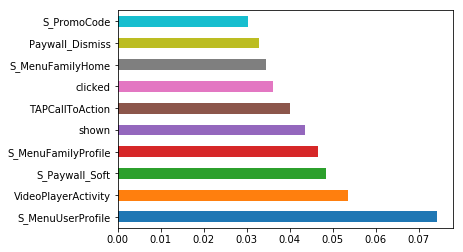

In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
#plt.show()
feat_importances


In [51]:
catego= 'adjust_network'

In [52]:
h2o.init(min_mem_size = 200)

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


--------------------------  ---------------------------------------------------
H2O cluster uptime:         29 mins 31 secs
H2O cluster timezone:       Etc/UTC
H2O data parsing timezone:  UTC
H2O cluster version:        3.26.0.1
H2O cluster version age:    1 year, 3 months and 10 days !!!
H2O cluster name:           H2O_from_python_unknownUser_ui2oyp
H2O cluster total nodes:    1
H2O cluster free memory:    29.31 Gb
H2O cluster total cores:    70
H2O cluster allowed cores:  70
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         Amazon S3, XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.5.6 final
--------------------------  ---------------------------------------------------

In [53]:
N= raw_data[feat]
C= raw_data[catego]
Y= raw_data['y']
df= pd.concat( [N, C, Y  ], axis = 1)

In [54]:
X_hf = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [55]:
train, test = X_hf.split_frame(ratios = [.7], seed=0)

In [56]:
 X_hf.describe()

Rows:7294
Cols:42




PromoCodeRedeem S_PromoCode SignUp MenuFamilyDefault ViewAllCollections MenuHelp LogIn S_DAPPastPlansPremium MenuMemberStats RateActivityDAP S_NPSScore Feedback_RateActivity OBCreateUser DAPActivityCompleted SkillsViewAllSkills S_MenuEditBaby S_ProgressHome S_MilestonesHome S_DAPNewSkills Dismiss_Feedback_RateActivity S_IAIntro S_MenuUserProfile MilestonesUpdate S_MenuFamilyProfile S_MenuFamilyHome clicked S_SPHome S_FeedHome S_PremiumProcess dismissed OBCreateTwins ArticleView S_OBBabyName S_CollectionView ActivityView WhatchAd Video_Completed Paywall_Dismiss IAStartAssessment screenwidth adjust_network y 
 
 
 type real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real real enum enum 
 mins 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 480.0 
 mean 0.07315370829784845 0.1831552670451713 1.058283104023345 0.0702983134030821 0.16879640807310442 0.05638199120278264 0.9279496725027132 0.3682435930746358 1.3096547273104755 0.053089518251552566 0.05730490754474055 0.19467406953247074 1.07383321967515 0.8467589151754702 0.5035288706067591 0.7217266351183014 1.6357288746871395 2.8168235045943693 0.03318215979824035 0.018976096614880898 1.2241869359264608 1.5094371498133738 1.3725942848960138 1.8293968529257536 4.3117813153198465 0.932017026221587 2.1881908348819086 1.1429816633842884 4.899852058006626 0.4644224938857148 0.04995221498186096 1.3403768860656473 1.3729109961713664 1.8213711869132638 4.1368149675350026 0.10296154816977975 0.9568265212972122 0.4363441584626025 1.0182939101182529 963.7044242377094 
 maxs 2.0 4.0 3.0 3.0 3.0 3.0 6.0 3.0 48.0 3.0 6.0 12.0 3.0 30.0 16.0 15.0 27.0 44.0 3.0 3.0 9.0 24.0 22.0 51.0 78.0 18.0 43.0 15.0 134.0 18.0 3.0 24.0 21.0 25.0 62.0 19.0 25.0 6.0 9.0 1600.0 
 sigma 0.2920662392518751 0.5991692752306822 0.27791338768153134 0.3408797147508738 0.5598409204855285 0.2676400866434549 0.5378269137652552 0.741837020566339 4.6218231215191645 0.3213142147244261 0.4729515313066264 0.623657289582913 0.2534283960797298 2.5611939001972357 1.5570617056734153 1.659772790069909 3.6018319205442957 6.384493026357276 0.15542119159246523 0.1183828331906214 0.7860432555954832 2.961257175966458 2.923219097956882 5.0188862920233195 8.630831152779251 1.9027653489287237 1.5201256310448883 2.208236867256259 12.713001669184427 1.5512332096029413 0.2643737177768594 2.5228011420004868 1.370762668982723 3.54307363302956 6.7910699536879955 0.3819328797218077 1.559801175587122 0.48044912785462596 0.6757652882750398 184.82150802209728 
 zeros 6665 6283 1 6871 6476 6873 771 5103 5699 7043 7142 6312 0 5055 6191 4883 4327 4157 6844 7046 36 3939 4494 4258 3382 3985 0 3800 3299 5611 6962 4129 4 3536 2432 6320 3753 3183 719 0 
 missing 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 4.0 1.0 0.0 0.0 2.0 0.0 3.0 0.0 1.0 1.0 1.0 1080.0 Facebook Freemium 
 1 0.0 0.0 1.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 4.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 720.0 Instagram Freemium 
 2 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 1.0 3.0 0.0 0.0 1.0 4.0 0.0 2.0 3.0 0.0 1.0 1.0 12.0 0.0 0.0 1.0 1.0 2.0 4.0 1.0 0.0 1.0 1.0 720.0 Organic Freemium 
 3 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 2.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 720.0 Organic Freemium 
 4 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 2.0 0.0 0.0 3.0 0.0 1.0 1.0 6.0 0.0 0.0 0.0 1.0 1.0 1080.0 Instagram Freemium 
 5 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0

In [57]:
feat= X_hf.columns[:-2]
feat

['PromoCodeRedeem',
 'S_PromoCode',
 'SignUp',
 'MenuFamilyDefault',
 'ViewAllCollections',
 'MenuHelp',
 'LogIn',
 'S_DAPPastPlansPremium',
 'MenuMemberStats',
 'RateActivityDAP',
 'S_NPSScore',
 'Feedback_RateActivity',
 'OBCreateUser',
 'DAPActivityCompleted',
 'SkillsViewAllSkills',
 'S_MenuEditBaby',
 'S_ProgressHome',
 'S_MilestonesHome',
 'S_DAPNewSkills',
 'Dismiss_Feedback_RateActivity',
 'S_IAIntro',
 'S_MenuUserProfile',
 'MilestonesUpdate',
 'S_MenuFamilyProfile',
 'S_MenuFamilyHome',
 'clicked',
 'S_SPHome',
 'S_FeedHome',
 'S_PremiumProcess',
 'dismissed',
 'OBCreateTwins',
 'ArticleView',
 'S_OBBabyName',
 'S_CollectionView',
 'ActivityView',
 'WhatchAd',
 'Video_Completed',
 'Paywall_Dismiss',
 'IAStartAssessment',
 'screenwidth']

In [58]:
nam= ['CeliaBROsgbm','CeliaBROsDRF','CeliaBROsGLM','CeliaBROsXGB']
#feat.append('timezone')

#Var= ['language', 'mp_region', 'city', 'signup_provider', 'timezone', 'user_gender',
 #              'email_domain', 'adjust_network', 'baby_gender', 'weeks_before_birth', 
  #             'baby_age_at_signup_meses', 'edad_bebe_actual_meses']

gbm = H2OGradientBoostingEstimator(model_id = nam[0], seed = 0, balance_classes=True,  nfolds = 10)
gbm.train(  x= feat, y='y', training_frame=train)

DRF = H2ORandomForestEstimator(model_id = nam[1], seed = 0, balance_classes=True, binomial_double_trees=True,  nfolds = 10)
DRF.train(  x= feat, y='y', training_frame=train)

GLM = H2OGeneralizedLinearEstimator(model_id = nam[2], seed = 0,family = 'binomial',  nfolds = 10)
GLM.train(  x= feat, y='y', training_frame=train)

XGB = H2OXGBoostEstimator(model_id = nam[3], seed = 0,  nfolds = 10)
XGB.train(  x= feat, y='y', training_frame=train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%


In [59]:
m= ['gbm','DRF','GLM','XGB']
nam= ['CeliaBROsgbm','CeliaBROsDRF','CeliaBROsGLM','CeliaBROsXGB']

gbmf =  gbm.model_performance(test).confusion_matrix().to_list()
ger= gbmf[1][0]/(gbmf[1][0]+gbmf[1][1])

DRFf =  DRF.model_performance(test).confusion_matrix().to_list()
DRFer= DRFf[1][0]/(DRFf[1][0]+DRFf[1][1])

GLMf =  GLM.model_performance(test).confusion_matrix().to_list()
GLMer= GLMf[1][0]/(GLMf[1][0]+GLMf[1][1])

XGBf =  XGB.model_performance(test).confusion_matrix().to_list()
XGBer= XGBf[1][0]/(XGBf[1][0]+XGBf[1][1])

er= [ger,DRFer,GLMer,XGBer]
data = {'Model':nam,
       'Error':er}

data= pd.DataFrame(data)
data

Error         Model
0  0.001857  CeliaBROsgbm
1  0.000929  CeliaBROsDRF
2  0.060353  CeliaBROsGLM
3  0.001857  CeliaBROsXGB

In [60]:
gbm.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8434359181059752: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ------------
Freemium  1083        1          0.0009   (1.0/1084.0)
Premium   2           1075       0.0019   (2.0/1077.0)
Total     1085        1076       0.0014   (3.0/2161.0)

In [61]:
GLM.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3726493135245871: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  --------------
Freemium  1037        47         0.0434   (47.0/1084.0)
Premium   65          1012       0.0604   (65.0/1077.0)
Total     1102        1059       0.0518   (112.0/2161.0)

In [62]:
DRF.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5995705078803109: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ------------
Freemium  1084        0          0        (0.0/1084.0)
Premium   1           1076       0.0009   (1.0/1077.0)
Total     1085        1076       0.0005   (1.0/2161.0)

In [63]:
XGB.model_performance(test).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9835664629936218: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ------------
Freemium  1084        0          0        (0.0/1084.0)
Premium   2           1075       0.0019   (2.0/1077.0)
Total     1086        1075       0.0009   (2.0/2161.0)

In [64]:
feat

['PromoCodeRedeem',
 'S_PromoCode',
 'SignUp',
 'MenuFamilyDefault',
 'ViewAllCollections',
 'MenuHelp',
 'LogIn',
 'S_DAPPastPlansPremium',
 'MenuMemberStats',
 'RateActivityDAP',
 'S_NPSScore',
 'Feedback_RateActivity',
 'OBCreateUser',
 'DAPActivityCompleted',
 'SkillsViewAllSkills',
 'S_MenuEditBaby',
 'S_ProgressHome',
 'S_MilestonesHome',
 'S_DAPNewSkills',
 'Dismiss_Feedback_RateActivity',
 'S_IAIntro',
 'S_MenuUserProfile',
 'MilestonesUpdate',
 'S_MenuFamilyProfile',
 'S_MenuFamilyHome',
 'clicked',
 'S_SPHome',
 'S_FeedHome',
 'S_PremiumProcess',
 'dismissed',
 'OBCreateTwins',
 'ArticleView',
 'S_OBBabyName',
 'S_CollectionView',
 'ActivityView',
 'WhatchAd',
 'Video_Completed',
 'Paywall_Dismiss',
 'IAStartAssessment',
 'screenwidth']

In [65]:
n1 = list(np.arange(50, 500, 110 ))
n2 =  list(np.arange(20, 242, 120))
params = { 'ntrees': n1, 'max_depth' : n2 }
XGB = H2OXGBoostEstimator(model_id = "BR", seed = 0,  nfolds = 10)
#RF = H2ORandomForestEstimator(model_id = "CeliaUSOsFTDRF", seed = 0, balance_classes=True, binomial_double_trees=True,  nfolds = 10)
#gbm = H2OGradientBoostingEstimator(model_id = "USgbm", seed = 0, balance_classes=True,  nfolds = 10)
grid = H2OGridSearch(model=XGB, hyper_params=params)
params 

{'max_depth': [20, 140], 'ntrees': [50, 160, 270, 380, 490]}

In [66]:
grid.train(x=feat, y= 'y', training_frame = train , validation_frame=test)

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [67]:
grid_train = grid.get_grid(sort_by='recall', decreasing=True )
grid_train 

    max_depth ntrees  \
0          20    270   
1          20    160   
2         140    270   
3         140    160   
4         140     50   
5         140    490   
6         140    380   
7          20    490   
8          20    380   
9          20     50   

                                                             model_ids  \
0   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_5   
1   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_3   
2   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_6   
3   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_4   
4   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_2   
5  Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_10   
6   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_8   
7   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_9   
8   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_

In [68]:
path='/home/fbfakeevents/Conversion/BehaviorMixpanel/Models/aOS/BR'

g = grid_train
print(g.grid_id)
print(g)
for i, m in enumerate(g.models):
    print("Save model" + m.model_id + " to " + path + "/" + m.model_id)
    h2o.save_model(model=m, path=path, force=True)

Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291
    max_depth ntrees  \
0          20    270   
1          20    160   
2         140    270   
3         140    160   
4         140     50   
5         140    490   
6         140    380   
7          20    490   
8          20    380   
9          20     50   

                                                             model_ids  \
0   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_5   
1   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_3   
2   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_6   
3   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_4   
4   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_2   
5  Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_10   
6   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_8   
7   Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_9   
8   Grid_X

In [ ]:
#import os
#os.remove("ChangedFile.csv")
#print("File Removed!")
#Para borrar entrenados que no sirven 

In [69]:
## model = grid_train.models[0]
model =  h2o.load_model(path+ '/'+ 'Grid_XGBoost_py_7_sid_9bd8_model_python_1603732041839_7291_model_5')
#model

In [70]:
model.model_performance(train).confusion_matrix()

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.47303149104118347: 


Freemium    Premium    Error    Rate
--------  ----------  ---------  -------  ------------
Freemium  2563        0          0        (0.0/2563.0)
Premium   1           2569       0.0004   (1.0/2570.0)
Total     2564        2569       0.0002   (1.0/5133.0)

In [71]:
roc = model.model_performance(test_data=test, train=train)

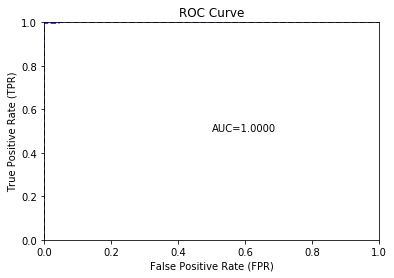

In [72]:
roc.plot()